In [1]:
import pandas as pd
import numpy as np

DATA DESCRIPTION
```
file name -> Columns
quater-i.csv -> ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']
items.csv -> ['item_id', 'item_name']
```
Dataset Link - https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link

In [2]:
'''# import like this
items_path = "/content/drive/MyDrive/DSMP/01 - Python/Daily Tasks/Week 7/data/items.csv"
q1_path = "/content/drive/MyDrive/DSMP/01 - Python/Daily Tasks/Week 7/data/quarter-1.csv"
q2_path = "/content/drive/MyDrive/DSMP/01 - Python/Daily Tasks/Week 7/data/quarter-2.csv"
q3_path = "/content/drive/MyDrive/DSMP/01 - Python/Daily Tasks/Week 7/data/quarter-3.csv"
'''

q1 = pd.read_csv('quarter-1.csv')
q2 = pd.read_csv('quarter-2.csv')
q3 = pd.read_csv('quarter-3.csv')

items = pd.read_csv('items.csv')
items.head(2)

,item_id,item_name
0,0,Chips and Fresh Tomato Salsa
1,1,Izze


In [10]:
q1.shape

(2275, 5)

In [19]:
q1.head(3)

,order_id,quantity,item_id,choice_description_id,item_price
0,1,1,1,1,$3.39
1,1,1,2,2,$3.39
2,2,2,4,3,$16.98


In [11]:
q2.shape

(2347, 5)

In [12]:
q3.shape

(0, 5)

In [13]:
q3.head()

,order_id,quantity,item_id,choice_description_id,item_price


###`Q:1-5`
1. You are given three quater files, your job is to append these three files and make a single dataframe.
2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
4. Find out items which has made most revenue in each quarter.
5. Find out avg order price of each quarter.

***Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.***

In [3]:
'''1. You are given three quater files, your job is to append these three files and make a single dataframe'''
df=pd.concat([q1,q2,q3],ignore_index=True)
df.head(3)
df

,order_id,quantity,item_id,choice_description_id,item_price
0,1,1,1,1,$3.39
1,1,1,2,2,$3.39
2,2,2,4,3,$16.98
3,4,1,7,6,$9.25
4,6,1,9,8,$8.75
...,...,...,...,...,...
4617,1829,1,23,92,$11.25
4618,1830,1,23,1043,$11.25
4619,1832,1,10,116,$8.75
4620,1832,1,8,0,$4.45


In [5]:
'''3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.'''
df1=q1.merge(items,on='item_id')
df1.head(3)
df1['item_name'].value_counts().idxmax()

'Chicken Bowl'

In [13]:
df2=q2.merge(items,on='item_id')
df2.head(3)
df1['item_name'].value_counts().idxmax()

'Chicken Bowl'

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   order_id               2275 non-null   int64 
 1   quantity               2275 non-null   int64 
 2   item_id                2275 non-null   int64 
 3   choice_description_id  2275 non-null   int64 
 4   item_price             2275 non-null   object
 5   item_name              2275 non-null   object
dtypes: int64(4), object(2)
memory usage: 106.8+ KB


In [9]:
'''4. Find out items which has made most revenue in each quarter.'''

df1['item_price']=(df1['item_price'].str.replace('$','').astype(float) * 84.58).round(2)
df1.head(4)


,order_id,quantity,item_id,choice_description_id,item_price,item_name
0,1,1,1,1,286.73,Izze
1,1,1,2,2,286.73,Nantucket Nectar
2,2,2,4,3,1436.17,Chicken Bowl
3,4,1,7,6,782.36,Steak Soft Tacos


In [11]:
df1['Total_Price']=df1['quantity']*df1['item_price']
df1.head()

,order_id,quantity,item_id,choice_description_id,item_price,item_name,Total_Price
0,1,1,1,1,286.73,Izze,286.73
1,1,1,2,2,286.73,Nantucket Nectar,286.73
2,2,2,4,3,1436.17,Chicken Bowl,2872.34
3,4,1,7,6,782.36,Steak Soft Tacos,782.36
4,6,1,9,8,740.08,Chicken Crispy Tacos,740.08


In [14]:
df1.groupby('item_name')['Total_Price'].sum().idxmax()

'Chicken Bowl'

###`Q-6` From the IPL wala dataset you have to find the Purple cap holder each season.

*Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.*

Bowler's Economy = runs-conceded per six balls

In [2]:
ipl=pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
ipl.head(2)


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals


In [8]:
deliveries=pd.read_csv('ipl_deliveries.csv')
deliveries.head(3)

,ID,Team,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,1312200,Rajasthan RoyalsGujarat Titans,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
1,1312200,Rajasthan RoyalsGujarat Titans,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
2,1312200,Rajasthan RoyalsGujarat Titans,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans


In [9]:
Matchs=pd.read_csv('IPL_Matches_2008_2022.csv')
Matchs.head(3)


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough


In [6]:
ipl = ipl.merge(Matchs[['ID', 'Season']], on='ID')

ipl.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Season
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,2022
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,2022


In [16]:
df=ipl[ipl['isWicketDelivery']==1].groupby(['Season','bowler'])['isWicketDelivery'].count().reset_index(name='wickets').sort_values(by=['Season', 'wickets'],ascending=False)
df.groupby('Season').first()

,bowler,wickets
Season,,
2007/08,Sohail Tanvir,24
2009,RP Singh,26
2009/10,PP Ojha,22
2011,SL Malinga,30
2012,M Morkel,30
2013,DJ Bravo,34
2014,MM Sharma,26
2015,DJ Bravo,28
2016,B Kumar,24


###`Q-7:` Best bowler in death overs.
*Note: Have taken most no of wickets in case of tie with least economy*

Death Overs - [16-20]

In [9]:

ball=deliveries[deliveries['overs']>15]
total_wck=ball.groupby('bowler')['isWicketDelivery'].sum()
total_run=ball.groupby('bowler')['isWicketDelivery'].sum()
count=ball['bowler'].value_counts()
df=pd.DataFrame({'Total_ball':count,'Total_wcket':total_wck,'Total_run':total_run,'Strik_rate':np.round((total_run/count)*100)})
df.sort_values(by=['Total_wcket','Strik_rate'],ascending=False).head()

,Total_ball,Total_wcket,Total_run,Strik_rate
bowler,,,,
DJ Bravo,1179,115,115,10.0
SL Malinga,965,104,104,11.0
B Kumar,1048,82,82,8.0
JJ Bumrah,1072,79,79,7.0
SP Narine,717,64,64,9.0


###`Q-8` Batsman record season wise

Make a function which takes a input `batsman_name` and it returns a dataframe.
Columns of the data frame are - `['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate']`.
* In result make `Season` column as index.

* Avg - total_runs/ no of time got out. - player_out column will help.
* StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help
* Batsman Can score runs on No Balls.
* Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [21]:
deliveries=deliveries.merge(Matchs[['ID','Season']],on='ID')
deliveries.columns

Index(['ID', 'Team', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'BowlingTeam', 'Season'],
      dtype='object')

In [22]:
deliveries.loc[:,["Season","batter","innings","total_run","player_out","extra_type"]]

,Season,batter,innings,total_run,player_out,extra_type
0,2022,YBK Jaiswal,1,0,NaN,NaN
1,2022,YBK Jaiswal,1,1,NaN,legbyes
2,2022,JC Buttler,1,1,NaN,NaN
3,2022,YBK Jaiswal,1,0,NaN,NaN
4,2022,YBK Jaiswal,1,0,NaN,NaN
...,...,...,...,...,...,...
225949,2007/08,P Kumar,2,1,NaN,legbyes
225950,2007/08,SB Joshi,2,1,NaN,NaN
225951,2007/08,P Kumar,2,0,NaN,NaN
225952,2007/08,SB Joshi,2,1,NaN,wides


In [23]:
deliveries.extra_type.unique()

array([nan, 'legbyes', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [56]:
def fun(batter):
    player=batter
    batsman=deliveries[deliveries['batter']==player]
    total_run=batsman.groupby('Season')['total_run'].sum()
    count=batsman.groupby('Season')['total_run'].count()
    out=batsman[batsman['player_out']==player].groupby('Season')['player_out'].count()
    wide_count=batsman[batsman['extra_type']=='wides'].groupby('Season')['player_out'].count()
    max_run=batsman.groupby('Season')['total_run'].max()
    df=pd.DataFrame({'Avg':total_run/out,'HighestScore':max_run,'StrikeRate':np.round((total_run/(count-wide_count))*100)})
    return df
print(fun('N Rana'))    

               Avg  HighestScore  StrikeRate
Season                                      
2016     36.666667             6       141.0
2017     31.909091             6       127.0
2018     22.285714             6       131.0
2019     35.500000             6       148.0
2020/21  27.846154             6       139.0
2021     31.153846             6       125.0
2022     29.461538             7       148.0


###`Q-9` Using both dataset, make a dataframe as described below

Data Frame columns-> `['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']`

* BattingFigure->`<runs>/<balls>`
* BowlingFigure->`<wicket>/<runs-conceded>`

DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN
```
PlayerOfThematch BattingFigure BowlingFigure
V Kohli          112/76         nan  

```


In [10]:
pom=deliveries.merge(Matchs[['ID','Player_of_Match']],on='ID').loc[:,['Player_of_Match','batter','bowler','batsman_run','total_run','ballnumber','isWicketDelivery']]
pom

,Player_of_Match,batter,bowler,batsman_run,total_run,ballnumber,isWicketDelivery
0,HH Pandya,YBK Jaiswal,Mohammed Shami,0,0,1,0
1,HH Pandya,YBK Jaiswal,Mohammed Shami,0,1,2,0
2,HH Pandya,JC Buttler,Mohammed Shami,1,1,3,0
3,HH Pandya,YBK Jaiswal,Mohammed Shami,0,0,4,0
4,HH Pandya,YBK Jaiswal,Mohammed Shami,0,0,5,0
...,...,...,...,...,...,...,...
225949,BB McCullum,P Kumar,I Sharma,0,1,5,0
225950,BB McCullum,SB Joshi,I Sharma,1,1,6,0
225951,BB McCullum,P Kumar,I Sharma,0,0,7,0
225952,BB McCullum,SB Joshi,LR Shukla,0,1,1,0


In [18]:
pom_bat=pom[pom['Player_of_Match']==pom['batter']]
pom_ball=pom[pom['Player_of_Match']==pom['bowler']]
run=pom_bat.groupby('Player_of_Match')['batsman_run'].sum()
balls=pom_bat['Player_of_Match'].value_counts()
wicket=pom_ball.groupby('Player_of_Match')['isWicketDelivery'].sum()
total_run=pom_ball.groupby('Player_of_Match')['total_run'].sum()
df=pd.DataFrame({'BattingFigure':runs.astype('str')+'/'+balls.astype('str'),'BowlingFigure':wicket.astype(str)+'/'+total_run.astype(str)})
df.head()

,BattingFigure,BowlingFigure
Player_of_Match,,
A Chandila,NaN,4/13
A Kumble,645/2,11/49
A Mishra,2993/47,36/213
A Nehra,NaN,18/131
A Nortje,NaN,8/85


In [19]:
df.loc['V Kohli']

BattingFigure    4292/673
BowlingFigure         NaN
Name: V Kohli, dtype: object

## **Questions Based on Iris Dataset**

- **Sepal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **SepalLengthCm:** Sepal length of flowers in cm
    - **SepalWidthCm:** Sepal width of flowers in cm

- **Petal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **PetalLengthCm:** Petal length of flowers in cm
    - **PetalWidthCm:** Petal width of flowers in cm

- **Iris Virginica:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Versicolor:** https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Setosa:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv
    - **Unnamed 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

In [73]:

sepal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv")
petal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv")

virginica = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv")
versicolor = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv")
setosa = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv")


In [21]:
sepal_all.head(2)

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm
0,0,1,5.1,3.5
1,1,2,4.9,3.0


In [14]:
sepal_all.Id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150], dtype=int64)

In [15]:
petal_all.Id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150], dtype=int64)

In [37]:
virginica.head(2)

,Unnamed: 0,Id,Species
0,100,101,Iris-virginica
1,101,102,Iris-virginica


In [38]:
versicolor .head(2)

,Unnamed: 0,Id,Species
0,50,51,Iris-versicolor
1,51,52,Iris-versicolor


In [39]:
setosa.head()

,Unnamed: 0,Id,Species
0,0,1,Iris-setosa
1,1,2,Iris-setosa
2,2,3,Iris-setosa
3,3,4,Iris-setosa
4,4,5,Iris-setosa


In [41]:
setosa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50 non-null     int64 
 1   Id          50 non-null     int64 
 2   Species     50 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [74]:
sepal_all=sepal_all.drop(columns='Unnamed: 0')
petal_all=petal_all.drop(columns='Unnamed: 0')

In [56]:
setosa.Id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

### `Q-9:` Plot a bar chart of the average Sepal Length  of Virginica and average Petal length of Setosa flower.

In [29]:
setosa=setosa.merge(petal_all,on='Id')
setosa.head(2)

,Unnamed: 0,Id,Species,PetalLengthCm,PetalWidthCm
0,0,1,Iris-setosa,1.4,0.2
1,1,2,Iris-setosa,1.4,0.2


In [12]:
setosa.Id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [30]:
virginica=virginica.merge(sepal_all,on='Id')
virginica.head(2)

,Unnamed: 0,Id,Species,SepalLengthCm,SepalWidthCm
0,100,101,Iris-virginica,6.3,3.3
1,101,102,Iris-virginica,5.8,2.7


In [13]:
virginica.Id.unique()

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150], dtype=int64)

<Axes: title={'center': 'Average Sepal & Petal Lengths'}>

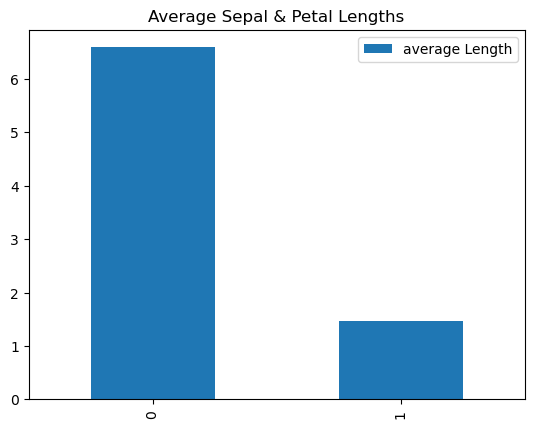

In [76]:
avg_len_v=virginica['SepalLengthCm'].mean().round(2)
avg_len_s=setosa['PetalLengthCm'].mean().round(2)
df=pd.DataFrame({
 'Flower':['virginica','setosa'],
 'average Length':[avg_len_v,avg_len_s]
})
df.plot(kind='bar',title='Average Sepal & Petal Lengths')

### `Q-10:` Create the complete dataset by uisng the below datasets:
- virginica
- versicolor
- setosa
- sepal all
- petal all

This dataset should have these below column names in order:
1. Id
2. Species
3. SepalLengthCm
4. SepalWidthCm
5. PetalLengthCm
6. PetalWidthCm

Also, the dataset should be shuffled means the `Id` column should not be in increasing or decreasing order. So, make a dataset which has the shuffled Id column. You can use `DataFrame.sample()` method to shuffle.

In [75]:
virginica=virginica.drop(columns='Unnamed: 0')
versicolor=versicolor.drop(columns='Unnamed: 0')
setosa=setosa.drop(columns='Unnamed: 0')


In [76]:
sepal_all=sepal_all.merge(petal_all,on='Id')
sepal_all.head(4)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2


In [77]:
df=pd.concat([setosa,versicolor,virginica],ignore_index=True)
df.head()

,Id,Species
0,1,Iris-setosa
1,2,Iris-setosa
2,3,Iris-setosa
3,4,Iris-setosa
4,5,Iris-setosa


In [78]:
df=df.merge(sepal_all,on='Id')
df.head()

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,Iris-setosa,5.1,3.5,1.4,0.2
1,2,Iris-setosa,4.9,3.0,1.4,0.2
2,3,Iris-setosa,4.7,3.2,1.3,0.2
3,4,Iris-setosa,4.6,3.1,1.5,0.2
4,5,Iris-setosa,5.0,3.6,1.4,0.2


### `Q-11:` Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:
- First create a dataset with merging the required datasets
- After that, use `groupby` to create groups based on the "Species" column.
- Then find out which are asked in this question.


The output should be like this:
```bash
Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************

Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4

**************************************************
```

In [79]:
df.head(4)

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,Iris-setosa,5.1,3.5,1.4,0.2
1,2,Iris-setosa,4.9,3.0,1.4,0.2
2,3,Iris-setosa,4.7,3.2,1.3,0.2
3,4,Iris-setosa,4.6,3.1,1.5,0.2


In [82]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [85]:
df[df['Species']=='Iris-setosa'].agg({'SepalWidthCm':['min','max']})

,SepalWidthCm
min,2.3
max,4.4


In [86]:
df[df['Species']=='Iris-versicolor'].agg({'SepalWidthCm':['min','max']})

,SepalWidthCm
min,2.0
max,3.4


In [87]:
df.groupby('Species').agg({'SepalWidthCm':['min','max']})

SepalWidthCm     
                         min  max
Species                          
Iris-setosa              2.3  4.4
Iris-versicolor          2.0  3.4
Iris-virginica           2.2  3.8